In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load the digits dataset (8x8 grayscale images)
digits = load_digits()
X, y = digits.images, digits.target  # Images and Labels

# Normalize pixel values (0-1)
X = X / 16.0

# Reshape to (N, H, W, C)
X = X.reshape(-1, 8, 8, 1)  # (samples, height, width, channels)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

y_train = np.eye(10)[y_train]  # One-hot encode
y_test = np.eye(10)[y_test]  # One-hot encode

# Print dataset details
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train labels shape: {y_train.shape}, Test labels shape: {y_test.shape}")  # (10, batch_size)


Train shape: (1437, 8, 8, 1), Test shape: (360, 8, 8, 1)
Train labels shape: (1437, 10), Test labels shape: (360, 10)


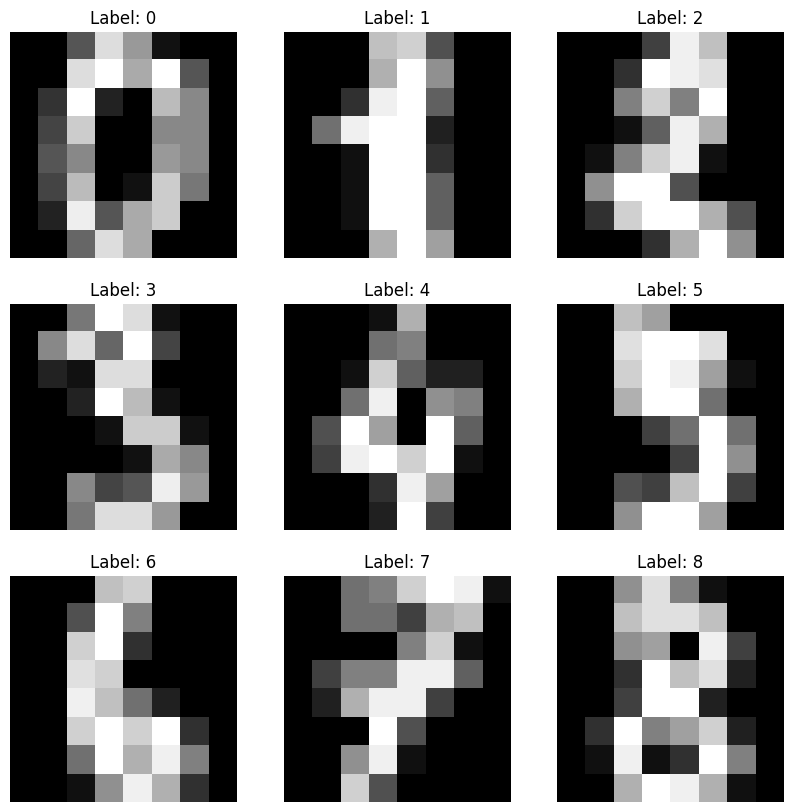

In [2]:
#show first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from models.ConvNet2D_numpy import ConvNet2D

# Create a model
in_channels = 1
out_channels = 10
num_filters = [32, 64]
filter_sizes = [3, 3]
strides = [1, 1]
paddings = ["valid", "valid"]
pooling = "max"
pooling_size = [2,2]
pooling_stride = [1,1]


model = ConvNet2D(in_channels, out_channels, num_filters, filter_sizes, strides, paddings)
model.fit(X_train, y_train, learning_rate=0.001, n_iters=50)

Cost after iteration 0: 2.555136168684698
Cost after iteration 10: 1.663964810664982
Cost after iteration 20: 0.8574119720397999
Cost after iteration 30: 0.46659935124322355
Cost after iteration 40: 0.3002691186784879


[np.float64(2.555136168684698),
 np.float64(2.3563446654254645),
 np.float64(2.256686699402833),
 np.float64(2.1807436255002535),
 np.float64(2.109964511039741),
 np.float64(2.038491733360117),
 np.float64(1.9649096376896553),
 np.float64(1.890761404245124),
 np.float64(1.8159038057443966),
 np.float64(1.7410214392472483),
 np.float64(1.663964810664982),
 np.float64(1.5821101753615117),
 np.float64(1.4947389754498206),
 np.float64(1.402660889327661),
 np.float64(1.3095456446136577),
 np.float64(1.2206452340314908),
 np.float64(1.1384290355054085),
 np.float64(1.0614361243025816),
 np.float64(0.9877295986021002),
 np.float64(0.9184539383023875),
 np.float64(0.8574119720397999),
 np.float64(0.8043163412861875),
 np.float64(0.752842864120358),
 np.float64(0.701639141170087),
 np.float64(0.6557271605328718),
 np.float64(0.6161006665012749),
 np.float64(0.5794307093631709),
 np.float64(0.5467929896253958),
 np.float64(0.5185383610094764),
 np.float64(0.49206540059129344),
 np.float64(0.4665

Test accuracy: 0.94


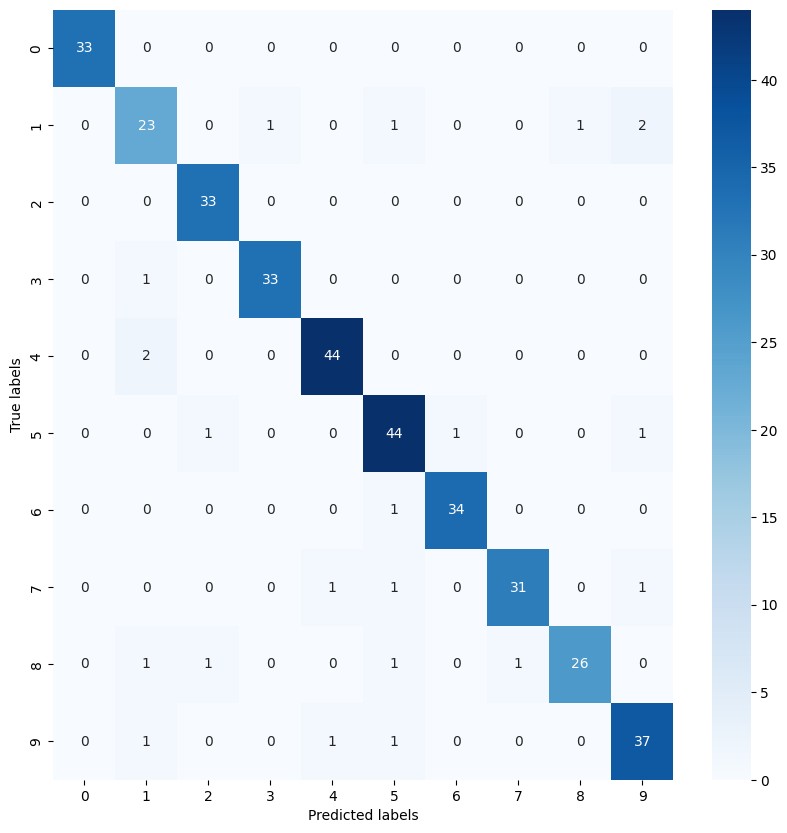

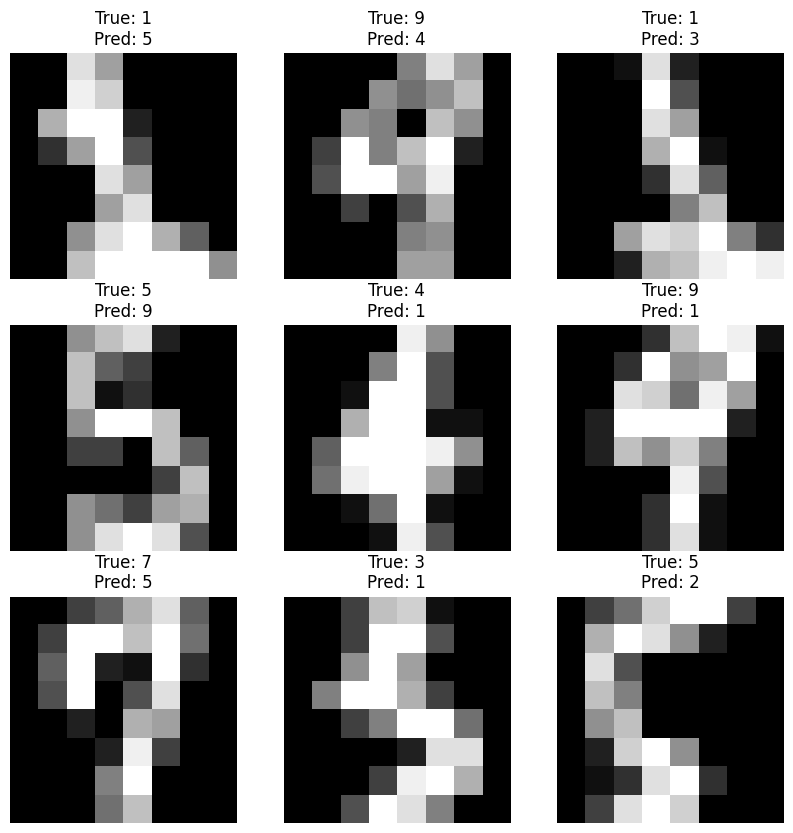

In [4]:
y_pred = model.predict(X_test)
test_acc = np.mean(y_pred == np.argmax(y_test.T, axis=0))
print(f"Test accuracy: {test_acc:.2f}")

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_test = np.argmax(y_test.T, axis=0)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#show images where the model failed
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[y_test != y_pred][i].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_test[y_test != y_pred][i]}\nPred: {y_pred[y_test != y_pred][i]}")
    plt.axis('off')
plt.show()
